## All descriptions in READme file

In [1]:
from model_class import Model
from sklearn.preprocessing import LabelEncoder

# instantiate model
model = Model()

2024-01-04 23:56:07.184036: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# path to data directory
PATH_TO_FLOWERS = "../data/flowers"

In [3]:
# load data
data = model.load_data(PATH_TO_FLOWERS)

In [4]:
# check data

data.head(), data.tail()

(                                              images labels
 0  <PIL.Image.Image image mode=RGB size=224x224 a...  daisy
 1  <PIL.Image.Image image mode=RGB size=224x224 a...  daisy
 2  <PIL.Image.Image image mode=RGB size=224x224 a...  daisy
 3  <PIL.Image.Image image mode=RGB size=224x224 a...  daisy
 4  <PIL.Image.Image image mode=RGB size=224x224 a...  daisy,
                                                  images     labels
 4312  <PIL.Image.Image image mode=RGB size=224x224 a...  sunflower
 4313  <PIL.Image.Image image mode=RGB size=224x224 a...  sunflower
 4314  <PIL.Image.Image image mode=RGB size=224x224 a...  sunflower
 4315  <PIL.Image.Image image mode=RGB size=224x224 a...  sunflower
 4316  <PIL.Image.Image image mode=RGB size=224x224 a...  sunflower)

In [5]:
# count how many unique tulips are in the data
tulip = model.return_count_of_unique_flowers(data, "tulip")
print(tulip)

images    984
labels    984
dtype: int64


In [6]:
# count how many unique roses are in the data
rose = model.return_count_of_unique_flowers(data, "rose")
print(rose)

images    784
labels    784
dtype: int64


In [7]:
# count how many unique daisies are in the data
daisy = model.return_count_of_unique_flowers(data, "daisy")
print(daisy)

images    764
labels    764
dtype: int64


In [8]:
# count how many unique dandelions are in the data
dandelion = model.return_count_of_unique_flowers(data, "dandelion")
print(dandelion)

images    1052
labels    1052
dtype: int64


In [9]:
# count how many unique sunflowers are in the data
sunflower = model.return_count_of_unique_flowers(data, "sunflower")
print(sunflower)

images    733
labels    733
dtype: int64


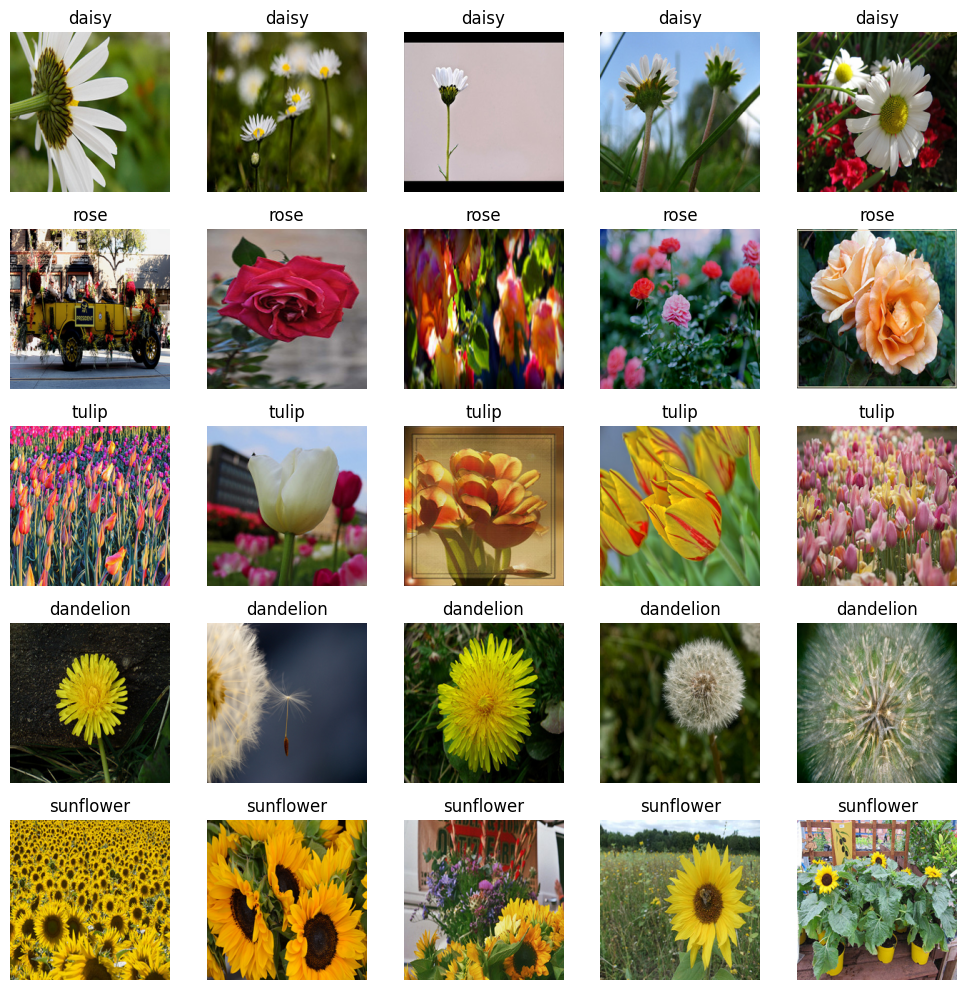

In [10]:
# plot five images from each label
model.plot_five_images_from_each_label(data)

In [11]:
# convert images column to tensor by using tf.keras.utils.img_to_array the expanding the dimensions using tf.expand_dims

data = model.convert_images_column_to_tensor(data)

In [12]:
# selecting max items per label such that the data is balanced
# data = model.select_max_items_per_label(data, 733)

In [13]:
# check data info
model.get_dataframe_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  4317 non-null   object
 1   labels  4317 non-null   object
dtypes: object(2)
memory usage: 67.6+ KB


In [14]:
# model.check_for_null_values(data)

In [15]:
# model.return_unique_labels(data)

In [16]:
# encode labels, by using LabelEncoder from sklearn.preprocessing. This will encode the labels into numbers (ints  0-4)
model.encode_labels(data)

,images,labels
0,"(((tf.Tensor([ 81. 103. 28.], shape=(3,), dty...",0
1,"(((tf.Tensor([30. 35. 3.], shape=(3,), dtype=...",0
2,"(((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...",0
3,"(((tf.Tensor([22. 37. 12.], shape=(3,), dtype=...",0
4,"(((tf.Tensor([48. 58. 49.], shape=(3,), dtype=...",0
...,...,...
4312,"(((tf.Tensor([249. 252. 106.], shape=(3,), dty...",3
4313,"(((tf.Tensor([79. 88. 92.], shape=(3,), dtype=...",3
4314,"(((tf.Tensor([46. 62. 16.], shape=(3,), dtype=...",3
4315,"(((tf.Tensor([222. 228. 243.], shape=(3,), dty...",3


In [17]:
labels = data["labels"]

In [18]:
labels.unique()

array([0, 2, 4, 1, 3])

In [19]:
# normalise images by dividing each pixel value by 255
model.normalise_images(data)

,images,labels
0,(((tf.Tensor([0.31764707 0.40392157 0.10980392...,0
1,(((tf.Tensor([0.11764706 0.13725491 0.01176471...,0
2,"(((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...",0
3,(((tf.Tensor([0.08627451 0.14509805 0.04705882...,0
4,(((tf.Tensor([0.1882353 0.22745098 0.19215687...,0
...,...,...
4312,(((tf.Tensor([0.9764706 0.9882353 0.41568628...,3
4313,(((tf.Tensor([0.30980393 0.34509805 0.36078432...,3
4314,(((tf.Tensor([0.18039216 0.24313726 0.0627451 ...,3
4315,(((tf.Tensor([0.87058824 0.89411765 0.9529412 ...,3


In [20]:
# split data into features and target
X, y = model.split_target_from_features(data)

In [21]:
# split data into train, test and validation sets
X_train, X_test, X_val, y_train, y_test, y_val = model.split_train_test_val(X, y)

In [22]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((2762,), (864,), (691,), (2762,), (864,), (691,))

In [23]:
# reshape images so that they are in the correct format for the CNN
X_train, X_test, X_val = model.reshape_images(X_train, X_test, X_val)

In [24]:
y_train[:10]

1843    4
905     2
356     0
1810    4
1457    2
2377    4
3725    3
1206    2
3170    1
1219    2
Name: labels, dtype: int64

In [25]:
# convert target to categorical values that the CNN can understand, that each target will be a vector of length 5, with a 1 in the index that corresponds to the label
y_train, y_test, y_val = model.convert_target_to_categorical(y_train, y_test, y_val)

In [26]:
y_train.shape, y_test.shape, y_val.shape

((2762, 5), (864, 5), (691, 5))

In [27]:
y_train[:10]

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [28]:
# build model
build_model = model.build_model()

In [29]:
# due to excessive long waiting times, I have commented out the grid search function
# model.grid_search(build_model,X_train, y_train)

In [30]:
build_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

In [31]:
y_train.shape

(2762, 5)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# early stopping callback to prevent overfitting, by monitoring the validation loss and stopping the model when the validation loss stops decreasing
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    min_delta=0.001,
    mode="min",
    restore_best_weights=True,
)

In [33]:
# train model
history = model.train_model(
    build_model,
    X_train,
    y_train,
    X_val,
    y_val,
    epochs=50,
    batch_size=32,
    early_stopping=early_stopping,
)

Epoch 1/50
87/87 [==============================] - 149s 2s/step - loss: 12.7585 - accuracy: 0.3353 - val_loss: 4.8187 - val_accuracy: 0.3488
Epoch 2/50
87/87 [==============================] - 148s 2s/step - loss: 2.5474 - accuracy: 0.3954 - val_loss: 1.6212 - val_accuracy: 0.4327
Epoch 3/50
87/87 [==============================] - 147s 2s/step - loss: 1.5394 - accuracy: 0.4088 - val_loss: 1.4416 - val_accuracy: 0.4284
Epoch 4/50
87/87 [==============================] - 144s 2s/step - loss: 1.4353 - accuracy: 0.4175 - val_loss: 1.3682 - val_accuracy: 0.4457
Epoch 5/50
87/87 [==============================] - 139s 2s/step - loss: 1.4012 - accuracy: 0.4352 - val_loss: 1.3834 - val_accuracy: 0.4891
Epoch 6/50
87/87 [==============================] - 138s 2s/step - loss: 1.3719 - accuracy: 0.4743 - val_loss: 1.3087 - val_accuracy: 0.5022
Epoch 7/50
87/87 [==============================] - 139s 2s/step - loss: 1.3116 - accuracy: 0.4848 - val_loss: 1.3130 - val_accuracy: 0.4718
Epoch 8/50
8

### Plot accuracy and Loss

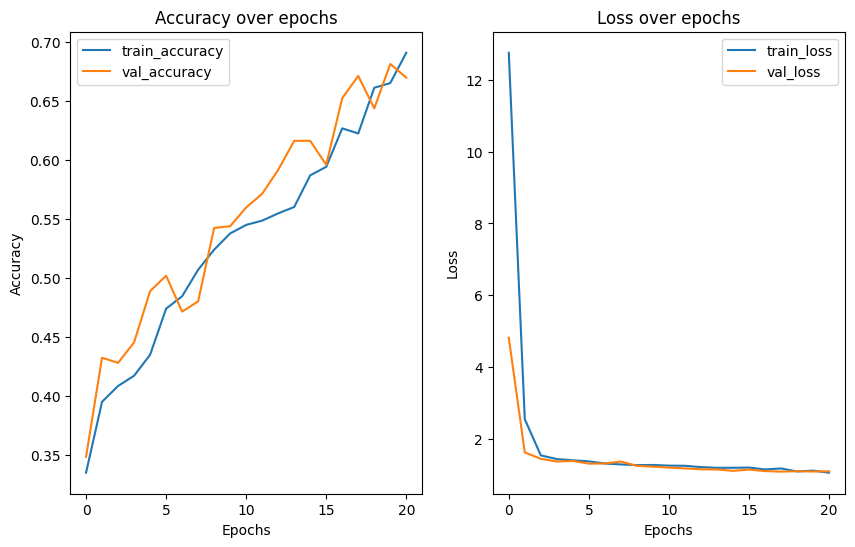

In [34]:
# plot loss and accuracy
model.plot_accuracy(history)

### Model evaluation

In [35]:
model.evaluate_model(build_model, X_test, y_test, y_train)   

27/27 [==============================] - 10s 361ms/step - loss: 1.2493 - accuracy: 0.5984
y_train: 
 [0. 0. 0. 1. 0.],
 y_test: 
 [0. 1. 0. 0. 0.]


In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Run prediction on test data

In [37]:
model.predict(build_model, X_test)

27/27 [==============================] - 11s 372ms/step


array([[7.5464562e-02, 2.8025112e-01, 9.3143238e-03, 6.0893881e-01,
        2.6031200e-02],
       [8.9604840e-02, 1.1508392e-02, 2.6999378e-01, 9.7621202e-02,
        5.3127176e-01],
       [1.8181824e-03, 1.5950482e-07, 1.0335066e-01, 3.0020345e-03,
        8.9182889e-01],
       ...,
       [7.9225846e-02, 1.8419498e-03, 2.4115200e-01, 1.0592514e-01,
        5.7185507e-01],
       [5.7090338e-02, 2.9778141e-03, 2.4368182e-01, 8.0873191e-02,
        6.1537671e-01],
       [1.8068731e-01, 7.6695450e-02, 3.6716983e-01, 4.7762565e-02,
        3.2768485e-01]], dtype=float32)

In [38]:
y_test

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]], dtype=float32)